In [3]:
import pandas as pd

In [4]:
import numpy as np

In [88]:
df_original= pd.read_csv('./adult.data')

In [89]:
df_original = df_original.replace(' ?',np.nan )

In [90]:
df_original

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [24]:
df_original.isnull().sum().sort_values(ascending=False)

occupation        1843
workclass         1836
native-country     583
income               0
hours-per-week       0
capital-loss         0
capital-gain         0
sex                  0
race                 0
relationship         0
marital-status       0
education-num        0
education            0
fnlwgt               0
age                  0
dtype: int64

In [28]:
df_miss_chk = df_original[['occupation','workclass','native-country']].isnull().astype(int).copy()

In [30]:
df_miss_chk['misscheck'] = df_miss_chk['occupation'] + df_miss_chk['workclass'] + df_miss_chk['native-country']

In [36]:
sum(df_miss_chk['misscheck']>0)

2399

In [41]:
df_original.occupation.describe()

count               30718
unique                 14
top        Prof-specialty
freq                 4140
Name: occupation, dtype: object

In [42]:
df_original.workclass.describe()

count        30725
unique           8
top        Private
freq         22696
Name: workclass, dtype: object

In [43]:
df_original['native-country'].describe()

count              31978
unique                41
top        United-States
freq               29170
Name: native-country, dtype: object

In [91]:
df_original.occupation = df_original.occupation.fillna(' Prof-specialty')
df_original.workclass = df_original.workclass.fillna(' Private')
df_original['native-country'] = df_original['native-country'].fillna(' United-States')

In [98]:
df_original.isnull().sum().sort_values(ascending=False)

income            0
native-country    0
hours-per-week    0
capital-loss      0
capital-gain      0
sex               0
race              0
relationship      0
occupation        0
marital-status    0
education-num     0
education         0
fnlwgt            0
workclass         0
age               0
dtype: int64

In [92]:
df_original[['age']].describe()

,age
count,32561.000000
mean,38.581647
std,13.640433
min,17.000000
25%,28.000000
50%,37.000000
75%,48.000000
max,90.000000


In [96]:
df_original['age'] = pd.cut(df_original['age'], bins = [0, 28, 48, 100], labels = ['Young', 'Middle-age', 'Senior'])

In [93]:
df_original['workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [99]:
df_original['workclass'][0]

' State-gov'

In [103]:
df_original = df_original.replace(' State-gov',' Government' )
df_original = df_original.replace(' Local-gov',' Government' )
df_original = df_original.replace(' Federal-gov',' Government' )

In [105]:
df_original = df_original.replace(' Never-worked',' Without-pay' )

In [106]:
df_original['workclass'].value_counts()

 Private             24532
 Government           4351
 Self-emp-not-inc     2541
 Self-emp-inc         1116
 Without-pay            21
Name: workclass, dtype: int64

In [108]:
df_original['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [111]:
df_original['education'] = df_original['education'].replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'],' Low-education')

In [112]:
df_original['education'].value_counts()

 HS-grad          10501
 Some-college      7291
 Bachelors         5355
 Low-education     4253
 Masters           1723
 Assoc-voc         1382
 Assoc-acdm        1067
 Prof-school        576
 Doctorate          413
Name: education, dtype: int64

In [113]:
df_original[['hours-per-week']].describe()

,hours-per-week
count,32561.000000
mean,40.437456
std,12.347429
min,1.000000
25%,40.000000
50%,40.000000
75%,45.000000
max,99.000000


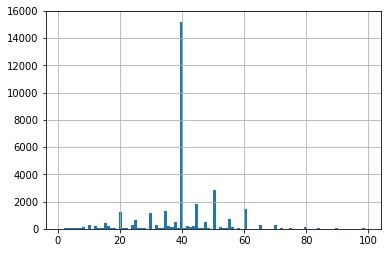

In [119]:
df_original['hours-per-week'].hist(bins=100)

In [120]:
df_original['hours-per-week'] = pd.cut(df_original['hours-per-week'], bins = [0, 28, 40, 100], labels = ['Less-workload', 'Normal-workload', 'Over-workload'])

In [121]:
df_original[['hours-per-week']].describe()

,hours-per-week
count,32561
unique,3
top,Normal-workload
freq,18891


In [124]:
df_original['capital-change'] = df_original['capital-gain'] - df_original['capital-loss']

In [68]:
df_original['income'] = df_original['income'].map({' <=50K': 0, ' >50K': 1})

In [77]:
df_original['sex'] = df_original['sex'].map({' Female': 0, ' Male': 1})

In [125]:
df_original.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,capital-change
0,Middle-age,Government,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,Normal-workload,United-States,<=50K,2174
1,Senior,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,Less-workload,United-States,<=50K,0
2,Middle-age,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,Normal-workload,United-States,<=50K,0
3,Senior,Private,234721,Low-education,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,Normal-workload,United-States,<=50K,0
4,Young,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,Normal-workload,Cuba,<=50K,0


In [131]:
df_original['capital-change'].describe()

count    32561.000000
mean       990.345014
std       7408.986951
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-change, dtype: float64

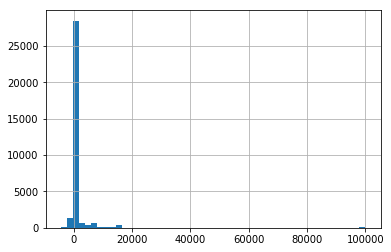

In [130]:
df_original['capital-change'].hist(bins=50)

In [136]:
df_original['capital-change'] = pd.cut(df_original['capital-change'], bins = [-5000, -0.5, 0.5, 1000000], labels = ['Capital-loss', 'No-change', 'Capital-gain'])

In [139]:
useful_feature = ['age','workclass','education','marital-status','occupation','relationship','hours-per-week','capital-change','income']

In [143]:
df_original.to_csv("income.csv",index=False)

In [145]:
df_original[useful_feature].to_csv("new_income_useful.csv",index=False)

AttributeError: 'numpy.ndarray' object has no attribute 'plt'

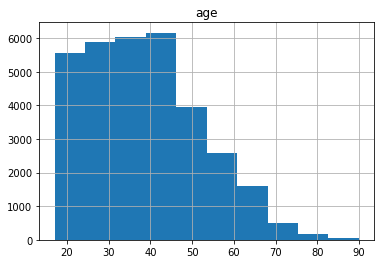

In [57]:
df_original[['age','income']].hist().plt()

In [81]:
df_original[['age']].corrwith(df_original.income)

age    0.234037
dtype: float64

In [148]:
df_original[useful_feature]['income'][0]

' <=50K'

In [152]:
df_final = df_original[useful_feature].copy()

In [154]:
df_final['income'] = df_final['income'].map({' <=50K': 0, ' >50K': 1})

In [163]:
feature_x = ['age','workclass','education','marital-status','occupation','relationship','hours-per-week','capital-change']
label_y = ['income']

In [164]:
df_final[feature_x]

,age,workclass,education,marital-status,occupation,relationship,hours-per-week,capital-change
0,Middle-age,Government,Bachelors,Never-married,Adm-clerical,Not-in-family,Normal-workload,Capital-gain
1,Senior,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Less-workload,No-change
2,Middle-age,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Normal-workload,No-change
3,Senior,Private,Low-education,Married-civ-spouse,Handlers-cleaners,Husband,Normal-workload,No-change
4,Young,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Normal-workload,No-change
5,Middle-age,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,Normal-workload,No-change
6,Senior,Private,Low-education,Married-spouse-absent,Other-service,Not-in-family,Less-workload,No-change
7,Senior,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,Over-workload,No-change
8,Middle-age,Private,Masters,Never-married,Prof-specialty,Not-in-family,Over-workload,Capital-gain
9,Middle-age,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Normal-workload,Capital-gain


In [156]:
from sklearn.preprocessing import OneHotEncoder

In [170]:
enc = OneHotEncoder()

In [171]:
enc.fit(df_final[feature_x])

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [173]:
x = pd.get_dummies(df_final[feature_x],drop_first=True)

In [174]:
y = df_final['income']

In [175]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [177]:
knn_cv = KNeighborsClassifier(n_neighbors=5)
cv_scores = cross_val_score(knn_cv, x, y, cv=5)
print(cv_scores)

[0.8298787  0.81572482 0.82048526 0.82248157 0.82324939]


In [239]:
np.tile([[1,2,3],[0,0,0]],(3,1,1)).transpose((1,1,0))

ValueError: repeated axis in transpose

In [269]:
np.tile(np.transpose([[1,2,3],[4,5,6]]),(3,1,1)).transpose()[0].transpose()

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [310]:
np.tile([[7,8,9],[10,11,12],[13,14,15]],[2,1,1])

array([[[ 7,  8,  9],
        [10, 11, 12],
        [13, 14, 15]],

       [[ 7,  8,  9],
        [10, 11, 12],
        [13, 14, 15]]])

In [271]:
np.array([[1,2,3],[4,5,6]]).shape

(2, 3)

In [ ]:
np.repeat(y[:2],)

In [340]:
mat_a = np.array([[1,2,3],[4,5,6]])
mat_b = np.array([[7,10,9],[10,11,12],[13,14,15]])

In [341]:
np.argsort(mat_b)

array([[0, 2, 1],
       [0, 1, 2],
       [0, 1, 2]])

In [308]:
mat_a.shape

(2, 3)

In [309]:
mat_b.shape

(3, 3)

In [311]:
check_a = np.repeat(mat_a, [mat_b.shape[0], mat_b.shape[0]], axis=0).reshape(mat_a.shape[0],-1,mat_a.shape[1])

In [313]:
check_b = np.tile(mat_b,[mat_a.shape[0],1,1])

In [314]:
check_a

array([[[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 6],
        [4, 5, 6]]])

In [315]:
check_b

array([[[ 7,  8,  9],
        [10, 11, 12],
        [13, 14, 15]],

       [[ 7,  8,  9],
        [10, 11, 12],
        [13, 14, 15]]])

In [303]:
np.repeat([[7,8,9],[10,11,12],[13,14,15]],[2],axis=0)

array([[ 7,  8,  9],
       [ 7,  8,  9],
       [10, 11, 12],
       [10, 11, 12],
       [13, 14, 15],
       [13, 14, 15]])

In [324]:
((check_a - check_b)**2)

array([[[ 36,  36,  36],
        [ 81,  81,  81],
        [144, 144, 144]],

       [[  9,   9,   9],
        [ 36,  36,  36],
        [ 81,  81,  81]]])

In [331]:
np.argsort((((check_a - check_b)**2).sum(axis=2))**0.5)

array([[10.39230485, 15.58845727, 20.78460969],
       [ 5.19615242, 10.39230485, 15.58845727]])

In [343]:
hh = np.argsort((((check_a - check_b)**2).sum(axis=2))**0.5)

In [349]:
np.argsort((((check_a - check_b)**2).sum(axis=2))**0.5)

array([[0, 1, 2],
       [0, 1, 2]])

In [186]:
assert 1 == 0, "The objects ARE NOT equal."

AssertionError: The objects ARE NOT equal.

In [369]:
tt = np.array([[1,5,8,2,9,30],[9,77,46,5,1,4]])

In [365]:
np.argwhere(np.argsort(kk)==0)

array([[0, 0],
       [1, 5]])

In [447]:
kk = np.argsort(tt,axis=1)

In [446]:
tt

array([[ 1,  5,  8,  2,  9, 30],
       [ 9, 77, 46,  5,  1,  4]])

In [470]:
kk

array([[0, 3, 1, 2, 4, 5],
       [4, 5, 3, 0, 2, 1]])

In [487]:
kk[[0]]

array([0, 3, 1, 2, 4, 5])

In [461]:
kk[:]

array([0, 3, 1, 2, 4, 5])

In [490]:
zz = np.array([[1,5,8,2,9,30],[9,77,46,5,1,4],[9,72,46,5,1,4]])

In [417]:
zz[[0,1]]

array([[ 1,  5,  8,  2,  9, 30],
       [ 9, 77, 46,  5,  1,  4]])

In [492]:
zz.transpose()[0]

array([1, 9, 9])

In [494]:
zz

array([[ 1,  5,  8,  2,  9, 30],
       [ 9, 77, 46,  5,  1,  4],
       [ 9, 72, 46,  5,  1,  4]])

In [498]:
zz[ind_]

array([ 1,  1, 72])

In [428]:
ind_ = np.ix_(np.argwhere(kk==0).transpose()[0],np.argwhere(kk==0).transpose()[1])

In [497]:
ind_ = (np.array([0, 1,2]),np.array([0, 4,1]))

In [442]:
np.argwhere(kk==2).transpose()

array([[0, 1],
       [3, 4]])

In [445]:
np.array([[0,2],[1,7],[2,6]]).transpose()[0]

array([0, 1, 2])

In [466]:
np.argwhere(kk==0)

array([[0, 0],
       [1, 3]])

In [454]:
np.argwhere(kk==1)

array([[0, 2],
       [1, 5]])

In [384]:
np.argwhere(kk==2)

array([[0, 3],
       [1, 4]])

In [318]:
x[:3].shape[0]

3

In [190]:
y.shape

(32561,)

In [191]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [319]:
np.repeat(5,10)

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [333]:
len(x.shape)

2

In [337]:
np.argsort([100,5,10])

array([1, 2, 0])

In [499]:
mm = np.array([0,5,10,15,20,25])

In [506]:
mm = np.array([[0,1,0,1],[1,1,1,1],[0,0,-1,1]])

In [508]:
mm.transpose()

array([[ 0,  1,  0],
       [ 1,  1,  0],
       [ 0,  1, -1],
       [ 1,  1,  1]])

In [571]:
ttt = np.count_nonzero(mm.transpose() == 1,axis=1)

In [576]:
yyy = ttt>int(3/2)

In [577]:
yyy.astype(int)

array([0, 1, 0, 1])

In [512]:
a = np.array([])

In [527]:
len(b)

4

In [543]:
int(5/2)

2

In [513]:
b = np.array([0,1,0,1])

In [541]:
b.reshape(1,-1)

array([[0, 1, 0, 1]])

In [515]:
np.concatenate((a, b), axis=0)

array([0., 1., 0., 1.])

In [516]:
c = np.array([1,1,1,1])

In [531]:
np.concatenate((b,c), axis = 1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [557]:
nnn= a

In [558]:
a

array([], dtype=float64)

In [563]:
nnn = b

In [568]:
nnn = np.vstack([nnn,b])

In [570]:
np.vstack([nnn,c])

array([[0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [1, 1, 1, 1]])

In [530]:
nnn.vstack((nnn,b))

AttributeError: 'numpy.ndarray' object has no attribute 'vstack'

In [548]:
nnn

array([[0, 1, 0, 1],
       [1, 1, 1, 1]])

In [549]:
c

array([1, 1, 1, 1])

In [559]:
np.vstack([nnn,a])

array([], shape=(2, 0), dtype=float64)

In [552]:
np.concatenate([nnn,c],axis=0)

ValueError: all the input arrays must have same number of dimensions

In [546]:
np.array(y)

array([0, 0, 0, ..., 0, 0, 1])

In [581]:
x[:30000]

,age_Senior,age_Young,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ Without-pay,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,...,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,hours-per-week_Normal-workload,hours-per-week_Over-workload,capital-change_No-change,capital-change_Capital-gain
0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
1,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,1,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
6,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
7,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
8,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
9,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [595]:
np.repeat(5,3)

array([5, 5, 5])

In [593]:
def KNN_classifier(valid_x, valid_y, base_x, base_y, k=3):
    '''
    input x, y must be 2D numpy arrays for this dataset, k is positive odd number
    '''
    assert len(base_x.shape) == len(valid_x.shape) == 2, "Expected 2D x input"
    assert len(base_y.shape) == len(valid_y.shape) == 1, "Expected 1D y target label"
    assert base_x.shape[0] == base_y.shape[0], "The row-counts between x and y for base dataset are not in line"
    assert valid_x.shape[0] == valid_y.shape[0], "The row-counts between x and y for validation dataset are not in line"
    assert base_x.shape[1] == valid_x.shape[1], "The col-counts mismatch for x"

    base_x_size = base_x.shape[0] 
    valid_x_size = valid_x.shape[0]
    x_feature_size = base_x.shape[1]
    
    valid_repeat_func = np.repeat(base_x_size,valid_x_size)
    valid_x_mat = np.repeat(valid_x, valid_repeat_func, axis=0).reshape(valid_x_size,-1,x_feature_size)
    base_x_mat = np.tile(base_x,[valid_x_size,1,1])
    
    diff_mat = valid_x_mat - base_x_mat
    L2_mat = (((diff_mat)**2).sum(axis=2))**0.5
    sorted_L2 = np.argsort(L2_mat)
    sorted_L2_ind = np.argsort(L2_mat).transpose()
    label_array = np.array([])
    ref_k = int(k/2) 
    for i in range(k):
        label_index = sorted_L2_ind[i]
        class_label = base_y[label_index]
        if len(label_array) == 0:
            label_array = class_label
        else:
            label_array = np.vstack([label_array,class_label])
            
    temp_array = label_array.transpose()
    one_count = np.count_nonzero(temp_array == 1,axis=1)
    one_count_chk = one_count > ref_k
    y_predict = one_count_chk.astype(int)
    
    return y_predict

In [608]:
y_predict = KNN_classifier(np.array(x[30000:]),np.array(y[30000:]),np.array(x[:30000]),np.array(y[:30000]),5)

In [617]:
y_label = np.array(y[30000:])

In [614]:
y_predict

array([0, 0, 0, ..., 0, 0, 1])

In [616]:
len(y_label)

30000

In [612]:
from sklearn.metrics import accuracy_score

In [618]:
accuracy_score(y_label, y_predict)

0.8266302225693088

In [621]:
from sklearn.metrics import precision_recall_fscore_support

In [623]:
print(precision_recall_fscore_support(y_label, y_predict))

(array([0.86383818, 0.68539326]), array([0.9124544 , 0.57009346]), array([0.88748099, 0.62244898]), array([1919,  642]))


In [624]:
from sklearn.metrics import classification_report

In [627]:
print(classification_report(y_label, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1919
           1       0.64      0.59      0.61       642

   micro avg       0.81      0.81      0.81      2561
   macro avg       0.75      0.74      0.75      2561
weighted avg       0.81      0.81      0.81      2561



In [628]:
print(classification_report(y_label, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1919
           1       0.69      0.57      0.62       642

   micro avg       0.83      0.83      0.83      2561
   macro avg       0.77      0.74      0.75      2561
weighted avg       0.82      0.83      0.82      2561



In [592]:
np.array(y[30000:])

array([0, 0, 0, ..., 0, 0, 1])

In [596]:
base_x_size = x[:30000].shape[0] 
valid_x_size = x[30000:].shape[0]

In [597]:
valid_x_size

2561

In [604]:
len(np.repeat(base_x_size,valid_x_size))

2561

In [606]:
np.array(x[30000:])

array([[0, 1, 0, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 1, 0],
       ...,
       [1, 0, 1, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [619]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(np.array(x[:30000]),np.array(y[:30000]))

#Predict the response for test dataset
y_pred = knn.predict(np.array(x[30000:]))

In [620]:
accuracy_score(y_label, y_pred)

0.8149160484185864

In [632]:
import timeit
import time
start = timeit.default_timer()

#Your statements here
time.sleep(2)
stop = timeit.default_timer()

print('Time: ', stop - start)

Time:  2.0022402300019166


In [633]:

stop = timeit.default_timer()

print('Time: ', stop - start)

Time:  11928.801321293002


In [634]:
from sklearn.model_selection import KFold

In [635]:
kf = KFold(n_splits=10)

In [668]:
accuracy_for_each_fold = []
excution_time_for_each_fold = []
for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = np.array(x.iloc[train_index]), np.array(x.iloc[test_index])
    y_train, y_test = np.array(y.iloc[train_index]), np.array(y.iloc[test_index])
    start = timeit.default_timer()
    y_predict = KNN_classifier(valid_x = x_test, valid_y = y_test, base_x = x_train, base_y = y_train, k=3)
    stop = timeit.default_timer()
    accuracy_for_each_fold.append(accuracy_score(y_test, y_predict))
    excution_time_for_each_fold.append(stop - start)

TRAIN: [ 3257  3258  3259 ... 32558 32559 32560] TEST: [   0    1    2 ... 3254 3255 3256]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [3257 3258 3259 ... 6510 6511 6512]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [6513 6514 6515 ... 9766 9767 9768]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [ 9769  9770  9771 ... 13022 13023 13024]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [13025 13026 13027 ... 16278 16279 16280]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [16281 16282 16283 ... 19534 19535 19536]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [19537 19538 19539 ... 22790 22791 22792]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [22793 22794 22795 ... 26046 26047 26048]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [26049 26050 26051 ... 29302 29303 29304]
TRAIN: [    0     1     2 ... 29302 29303 29304] TEST: [29305 29306 29307 ... 32558 32559 32560]


In [675]:
sum(excution_time_for_each_fold)/10

32.58647193209909

In [676]:
sum(accuracy_for_each_fold)/10

0.8128435239465329

In [693]:
accuracy_for_each_fold = []
excution_time_for_each_fold = []
for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = np.array(x.iloc[train_index]), np.array(x.iloc[test_index])
    y_train, y_test = np.array(y.iloc[train_index]), np.array(y.iloc[test_index])
    start = timeit.default_timer()
    y_predict = KNN_classifier(valid_x = x_test, valid_y = y_test, base_x = x_train, base_y = y_train, k=5)
    stop = timeit.default_timer()
    accuracy_for_each_fold.append(accuracy_score(y_test, y_predict))
    excution_time_for_each_fold.append(stop - start)
    
print(sum(accuracy_for_each_fold)/10)    
print(sum(excution_time_for_each_fold)/10)


TRAIN: [ 3257  3258  3259 ... 32558 32559 32560] TEST: [   0    1    2 ... 3254 3255 3256]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [3257 3258 3259 ... 6510 6511 6512]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [6513 6514 6515 ... 9766 9767 9768]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [ 9769  9770  9771 ... 13022 13023 13024]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [13025 13026 13027 ... 16278 16279 16280]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [16281 16282 16283 ... 19534 19535 19536]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [19537 19538 19539 ... 22790 22791 22792]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [22793 22794 22795 ... 26046 26047 26048]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [26049 26050 26051 ... 29302 29303 29304]
TRAIN: [    0     1     2 ... 29302 29303 29304] TEST: [29305 29306 29307 ... 32558 32559 32560]
0.8223026250774179
32.64582378369814


In [694]:
accuracy_for_each_fold = []
excution_time_for_each_fold = []
for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = np.array(x.iloc[train_index]), np.array(x.iloc[test_index])
    y_train, y_test = np.array(y.iloc[train_index]), np.array(y.iloc[test_index])
    start = timeit.default_timer()
    y_predict = KNN_classifier(valid_x = x_test, valid_y = y_test, base_x = x_train, base_y = y_train, k=7)
    stop = timeit.default_timer()
    accuracy_for_each_fold.append(accuracy_score(y_test, y_predict))
    excution_time_for_each_fold.append(stop - start)
    
print(sum(accuracy_for_each_fold)/10)    
print(sum(excution_time_for_each_fold)/10)

TRAIN: [ 3257  3258  3259 ... 32558 32559 32560] TEST: [   0    1    2 ... 3254 3255 3256]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [3257 3258 3259 ... 6510 6511 6512]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [6513 6514 6515 ... 9766 9767 9768]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [ 9769  9770  9771 ... 13022 13023 13024]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [13025 13026 13027 ... 16278 16279 16280]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [16281 16282 16283 ... 19534 19535 19536]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [19537 19538 19539 ... 22790 22791 22792]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [22793 22794 22795 ... 26046 26047 26048]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [26049 26050 26051 ... 29302 29303 29304]
TRAIN: [    0     1     2 ... 29302 29303 29304] TEST: [29305 29306 29307 ... 32558 32559 32560]
0.827554364102568
32.71699559109911


In [695]:
accuracy_for_each_fold = []
excution_time_for_each_fold = []
for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = np.array(x.iloc[train_index]), np.array(x.iloc[test_index])
    y_train, y_test = np.array(y.iloc[train_index]), np.array(y.iloc[test_index])
    start = timeit.default_timer()
    y_predict = KNN_classifier(valid_x = x_test, valid_y = y_test, base_x = x_train, base_y = y_train, k=9)
    stop = timeit.default_timer()
    accuracy_for_each_fold.append(accuracy_score(y_test, y_predict))
    excution_time_for_each_fold.append(stop - start)
    
print(sum(accuracy_for_each_fold)/10)    
print(sum(excution_time_for_each_fold)/10)

TRAIN: [ 3257  3258  3259 ... 32558 32559 32560] TEST: [   0    1    2 ... 3254 3255 3256]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [3257 3258 3259 ... 6510 6511 6512]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [6513 6514 6515 ... 9766 9767 9768]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [ 9769  9770  9771 ... 13022 13023 13024]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [13025 13026 13027 ... 16278 16279 16280]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [16281 16282 16283 ... 19534 19535 19536]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [19537 19538 19539 ... 22790 22791 22792]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [22793 22794 22795 ... 26046 26047 26048]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [26049 26050 26051 ... 29302 29303 29304]
TRAIN: [    0     1     2 ... 29302 29303 29304] TEST: [29305 29306 29307 ... 32558 32559 32560]
0.830748580453063
32.6007153806997


In [696]:
accuracy_for_each_fold = []
excution_time_for_each_fold = []
for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = np.array(x.iloc[train_index]), np.array(x.iloc[test_index])
    y_train, y_test = np.array(y.iloc[train_index]), np.array(y.iloc[test_index])
    start = timeit.default_timer()
    y_predict = KNN_classifier(valid_x = x_test, valid_y = y_test, base_x = x_train, base_y = y_train, k=11)
    stop = timeit.default_timer()
    accuracy_for_each_fold.append(accuracy_score(y_test, y_predict))
    excution_time_for_each_fold.append(stop - start)
    
print(sum(accuracy_for_each_fold)/10)    
print(sum(excution_time_for_each_fold)/10)

TRAIN: [ 3257  3258  3259 ... 32558 32559 32560] TEST: [   0    1    2 ... 3254 3255 3256]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [3257 3258 3259 ... 6510 6511 6512]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [6513 6514 6515 ... 9766 9767 9768]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [ 9769  9770  9771 ... 13022 13023 13024]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [13025 13026 13027 ... 16278 16279 16280]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [16281 16282 16283 ... 19534 19535 19536]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [19537 19538 19539 ... 22790 22791 22792]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [22793 22794 22795 ... 26046 26047 26048]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [26049 26050 26051 ... 29302 29303 29304]
TRAIN: [    0     1     2 ... 29302 29303 29304] TEST: [29305 29306 29307 ... 32558 32559 32560]
0.8331440918407452
32.67752694020019


In [697]:
accuracy_for_each_fold = []
excution_time_for_each_fold = []
for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = np.array(x.iloc[train_index]), np.array(x.iloc[test_index])
    y_train, y_test = np.array(y.iloc[train_index]), np.array(y.iloc[test_index])
    start = timeit.default_timer()
    y_predict = KNN_classifier(valid_x = x_test, valid_y = y_test, base_x = x_train, base_y = y_train, k=13)
    stop = timeit.default_timer()
    accuracy_for_each_fold.append(accuracy_score(y_test, y_predict))
    excution_time_for_each_fold.append(stop - start)
    
print(sum(accuracy_for_each_fold)/10)    
print(sum(excution_time_for_each_fold)/10)

TRAIN: [ 3257  3258  3259 ... 32558 32559 32560] TEST: [   0    1    2 ... 3254 3255 3256]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [3257 3258 3259 ... 6510 6511 6512]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [6513 6514 6515 ... 9766 9767 9768]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [ 9769  9770  9771 ... 13022 13023 13024]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [13025 13026 13027 ... 16278 16279 16280]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [16281 16282 16283 ... 19534 19535 19536]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [19537 19538 19539 ... 22790 22791 22792]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [22793 22794 22795 ... 26046 26047 26048]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [26049 26050 26051 ... 29302 29303 29304]
TRAIN: [    0     1     2 ... 29302 29303 29304] TEST: [29305 29306 29307 ... 32558 32559 32560]
0.8343418616791352
32.75043568190085


In [698]:
accuracy_for_each_fold = []
excution_time_for_each_fold = []
for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = np.array(x.iloc[train_index]), np.array(x.iloc[test_index])
    y_train, y_test = np.array(y.iloc[train_index]), np.array(y.iloc[test_index])
    start = timeit.default_timer()
    y_predict = KNN_classifier(valid_x = x_test, valid_y = y_test, base_x = x_train, base_y = y_train, k=15)
    stop = timeit.default_timer()
    accuracy_for_each_fold.append(accuracy_score(y_test, y_predict))
    excution_time_for_each_fold.append(stop - start)
    
print(sum(accuracy_for_each_fold)/10)    
print(sum(excution_time_for_each_fold)/10)

TRAIN: [ 3257  3258  3259 ... 32558 32559 32560] TEST: [   0    1    2 ... 3254 3255 3256]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [3257 3258 3259 ... 6510 6511 6512]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [6513 6514 6515 ... 9766 9767 9768]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [ 9769  9770  9771 ... 13022 13023 13024]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [13025 13026 13027 ... 16278 16279 16280]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [16281 16282 16283 ... 19534 19535 19536]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [19537 19538 19539 ... 22790 22791 22792]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [22793 22794 22795 ... 26046 26047 26048]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [26049 26050 26051 ... 29302 29303 29304]
TRAIN: [    0     1     2 ... 29302 29303 29304] TEST: [29305 29306 29307 ... 32558 32559 32560]
0.8364302289002934
32.79179800800121


In [ ]:
sum(excution_time_for_each_fold)/10

In [ ]:
sum(accuracy_for_each_fold)/10

In [671]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn_sklearn = KNeighborsClassifier(n_neighbors=3)

In [673]:
accuracy_for_each_fold_sklearn = []
excution_time_for_each_fold_sklearn = []
for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = np.array(x.iloc[train_index]), np.array(x.iloc[test_index])
    y_train, y_test = np.array(y.iloc[train_index]), np.array(y.iloc[test_index])
    start = timeit.default_timer()
    knn_sklearn.fit(x_train,y_train)
    y_pred = knn_sklearn.predict(x_test)
    stop = timeit.default_timer()
    accuracy_for_each_fold_sklearn.append(accuracy_score(y_test, y_pred))
    excution_time_for_each_fold_sklearn.append(stop - start)

TRAIN: [ 3257  3258  3259 ... 32558 32559 32560] TEST: [   0    1    2 ... 3254 3255 3256]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [3257 3258 3259 ... 6510 6511 6512]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [6513 6514 6515 ... 9766 9767 9768]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [ 9769  9770  9771 ... 13022 13023 13024]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [13025 13026 13027 ... 16278 16279 16280]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [16281 16282 16283 ... 19534 19535 19536]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [19537 19538 19539 ... 22790 22791 22792]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [22793 22794 22795 ... 26046 26047 26048]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [26049 26050 26051 ... 29302 29303 29304]
TRAIN: [    0     1     2 ... 29302 29303 29304] TEST: [29305 29306 29307 ... 32558 32559 32560]


In [677]:
sum(accuracy_for_each_fold_sklearn)/10

0.8108472754581136

In [678]:
sum(excution_time_for_each_fold_sklearn)/10

3.5643059978006932

In [680]:
knn_sklearn = KNeighborsClassifier(n_neighbors=5)

In [681]:
accuracy_for_each_fold_sklearn = []
excution_time_for_each_fold_sklearn = []
for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = np.array(x.iloc[train_index]), np.array(x.iloc[test_index])
    y_train, y_test = np.array(y.iloc[train_index]), np.array(y.iloc[test_index])
    start = timeit.default_timer()
    knn_sklearn.fit(x_train,y_train)
    y_pred = knn_sklearn.predict(x_test)
    stop = timeit.default_timer()
    accuracy_for_each_fold_sklearn.append(accuracy_score(y_test, y_pred))
    excution_time_for_each_fold_sklearn.append(stop - start)
    
print(sum(accuracy_for_each_fold_sklearn)/10)
print(sum(excution_time_for_each_fold_sklearn)/10)

TRAIN: [ 3257  3258  3259 ... 32558 32559 32560] TEST: [   0    1    2 ... 3254 3255 3256]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [3257 3258 3259 ... 6510 6511 6512]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [6513 6514 6515 ... 9766 9767 9768]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [ 9769  9770  9771 ... 13022 13023 13024]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [13025 13026 13027 ... 16278 16279 16280]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [16281 16282 16283 ... 19534 19535 19536]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [19537 19538 19539 ... 22790 22791 22792]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [22793 22794 22795 ... 26046 26047 26048]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [26049 26050 26051 ... 29302 29303 29304]
TRAIN: [    0     1     2 ... 29302 29303 29304] TEST: [29305 29306 29307 ... 32558 32559 32560]
0.8222719785546007
3.918159771100181


In [682]:
knn_sklearn = KNeighborsClassifier(n_neighbors=7)

In [683]:
accuracy_for_each_fold_sklearn = []
excution_time_for_each_fold_sklearn = []
for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = np.array(x.iloc[train_index]), np.array(x.iloc[test_index])
    y_train, y_test = np.array(y.iloc[train_index]), np.array(y.iloc[test_index])
    start = timeit.default_timer()
    knn_sklearn.fit(x_train,y_train)
    y_pred = knn_sklearn.predict(x_test)
    stop = timeit.default_timer()
    accuracy_for_each_fold_sklearn.append(accuracy_score(y_test, y_pred))
    excution_time_for_each_fold_sklearn.append(stop - start)
    
print(sum(accuracy_for_each_fold_sklearn)/10)
print(sum(excution_time_for_each_fold_sklearn)/10)

TRAIN: [ 3257  3258  3259 ... 32558 32559 32560] TEST: [   0    1    2 ... 3254 3255 3256]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [3257 3258 3259 ... 6510 6511 6512]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [6513 6514 6515 ... 9766 9767 9768]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [ 9769  9770  9771 ... 13022 13023 13024]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [13025 13026 13027 ... 16278 16279 16280]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [16281 16282 16283 ... 19534 19535 19536]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [19537 19538 19539 ... 22790 22791 22792]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [22793 22794 22795 ... 26046 26047 26048]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [26049 26050 26051 ... 29302 29303 29304]
TRAIN: [    0     1     2 ... 29302 29303 29304] TEST: [29305 29306 29307 ... 32558 32559 32560]
0.8286907277389316
4.193106590302341


In [684]:
knn_sklearn = KNeighborsClassifier(n_neighbors=9)

In [685]:
accuracy_for_each_fold_sklearn = []
excution_time_for_each_fold_sklearn = []
for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = np.array(x.iloc[train_index]), np.array(x.iloc[test_index])
    y_train, y_test = np.array(y.iloc[train_index]), np.array(y.iloc[test_index])
    start = timeit.default_timer()
    knn_sklearn.fit(x_train,y_train)
    y_pred = knn_sklearn.predict(x_test)
    stop = timeit.default_timer()
    accuracy_for_each_fold_sklearn.append(accuracy_score(y_test, y_pred))
    excution_time_for_each_fold_sklearn.append(stop - start)
    
print(sum(accuracy_for_each_fold_sklearn)/10)
print(sum(excution_time_for_each_fold_sklearn)/10)

TRAIN: [ 3257  3258  3259 ... 32558 32559 32560] TEST: [   0    1    2 ... 3254 3255 3256]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [3257 3258 3259 ... 6510 6511 6512]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [6513 6514 6515 ... 9766 9767 9768]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [ 9769  9770  9771 ... 13022 13023 13024]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [13025 13026 13027 ... 16278 16279 16280]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [16281 16282 16283 ... 19534 19535 19536]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [19537 19538 19539 ... 22790 22791 22792]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [22793 22794 22795 ... 26046 26047 26048]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [26049 26050 26051 ... 29302 29303 29304]
TRAIN: [    0     1     2 ... 29302 29303 29304] TEST: [29305 29306 29307 ... 32558 32559 32560]
0.8323149100897028
4.431670361400757


In [686]:
knn_sklearn = KNeighborsClassifier(n_neighbors=11)

In [687]:
accuracy_for_each_fold_sklearn = []
excution_time_for_each_fold_sklearn = []
for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = np.array(x.iloc[train_index]), np.array(x.iloc[test_index])
    y_train, y_test = np.array(y.iloc[train_index]), np.array(y.iloc[test_index])
    start = timeit.default_timer()
    knn_sklearn.fit(x_train,y_train)
    y_pred = knn_sklearn.predict(x_test)
    stop = timeit.default_timer()
    accuracy_for_each_fold_sklearn.append(accuracy_score(y_test, y_pred))
    excution_time_for_each_fold_sklearn.append(stop - start)
    
print(sum(accuracy_for_each_fold_sklearn)/10)
print(sum(excution_time_for_each_fold_sklearn)/10)

TRAIN: [ 3257  3258  3259 ... 32558 32559 32560] TEST: [   0    1    2 ... 3254 3255 3256]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [3257 3258 3259 ... 6510 6511 6512]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [6513 6514 6515 ... 9766 9767 9768]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [ 9769  9770  9771 ... 13022 13023 13024]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [13025 13026 13027 ... 16278 16279 16280]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [16281 16282 16283 ... 19534 19535 19536]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [19537 19538 19539 ... 22790 22791 22792]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [22793 22794 22795 ... 26046 26047 26048]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [26049 26050 26051 ... 29302 29303 29304]
TRAIN: [    0     1     2 ... 29302 29303 29304] TEST: [29305 29306 29307 ... 32558 32559 32560]
0.8329906329138751
4.60110719850054


In [692]:
knn_sklearn = KNeighborsClassifier(n_neighbors=13)
accuracy_for_each_fold_sklearn = []
excution_time_for_each_fold_sklearn = []
for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = np.array(x.iloc[train_index]), np.array(x.iloc[test_index])
    y_train, y_test = np.array(y.iloc[train_index]), np.array(y.iloc[test_index])
    start = timeit.default_timer()
    knn_sklearn.fit(x_train,y_train)
    y_pred = knn_sklearn.predict(x_test)
    stop = timeit.default_timer()
    accuracy_for_each_fold_sklearn.append(accuracy_score(y_test, y_pred))
    excution_time_for_each_fold_sklearn.append(stop - start)
    
print(sum(accuracy_for_each_fold_sklearn)/10)
print(sum(excution_time_for_each_fold_sklearn)/10)

TRAIN: [ 3257  3258  3259 ... 32558 32559 32560] TEST: [   0    1    2 ... 3254 3255 3256]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [3257 3258 3259 ... 6510 6511 6512]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [6513 6514 6515 ... 9766 9767 9768]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [ 9769  9770  9771 ... 13022 13023 13024]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [13025 13026 13027 ... 16278 16279 16280]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [16281 16282 16283 ... 19534 19535 19536]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [19537 19538 19539 ... 22790 22791 22792]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [22793 22794 22795 ... 26046 26047 26048]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [26049 26050 26051 ... 29302 29303 29304]
TRAIN: [    0     1     2 ... 29302 29303 29304] TEST: [29305 29306 29307 ... 32558 32559 32560]
0.8344954337623973
4.788769976500044


In [688]:
knn_sklearn = KNeighborsClassifier(n_neighbors=15)
accuracy_for_each_fold_sklearn = []
excution_time_for_each_fold_sklearn = []
for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = np.array(x.iloc[train_index]), np.array(x.iloc[test_index])
    y_train, y_test = np.array(y.iloc[train_index]), np.array(y.iloc[test_index])
    start = timeit.default_timer()
    knn_sklearn.fit(x_train,y_train)
    y_pred = knn_sklearn.predict(x_test)
    stop = timeit.default_timer()
    accuracy_for_each_fold_sklearn.append(accuracy_score(y_test, y_pred))
    excution_time_for_each_fold_sklearn.append(stop - start)
    
print(sum(accuracy_for_each_fold_sklearn)/10)
print(sum(excution_time_for_each_fold_sklearn)/10)

TRAIN: [ 3257  3258  3259 ... 32558 32559 32560] TEST: [   0    1    2 ... 3254 3255 3256]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [3257 3258 3259 ... 6510 6511 6512]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [6513 6514 6515 ... 9766 9767 9768]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [ 9769  9770  9771 ... 13022 13023 13024]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [13025 13026 13027 ... 16278 16279 16280]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [16281 16282 16283 ... 19534 19535 19536]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [19537 19538 19539 ... 22790 22791 22792]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [22793 22794 22795 ... 26046 26047 26048]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [26049 26050 26051 ... 29302 29303 29304]
TRAIN: [    0     1     2 ... 29302 29303 29304] TEST: [29305 29306 29307 ... 32558 32559 32560]
0.8352631244441191
4.94451581669855


In [689]:
knn_sklearn = KNeighborsClassifier(n_neighbors=21)
accuracy_for_each_fold_sklearn = []
excution_time_for_each_fold_sklearn = []
for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = np.array(x.iloc[train_index]), np.array(x.iloc[test_index])
    y_train, y_test = np.array(y.iloc[train_index]), np.array(y.iloc[test_index])
    start = timeit.default_timer()
    knn_sklearn.fit(x_train,y_train)
    y_pred = knn_sklearn.predict(x_test)
    stop = timeit.default_timer()
    accuracy_for_each_fold_sklearn.append(accuracy_score(y_test, y_pred))
    excution_time_for_each_fold_sklearn.append(stop - start)
    
print(sum(accuracy_for_each_fold_sklearn)/10)
print(sum(excution_time_for_each_fold_sklearn)/10)

TRAIN: [ 3257  3258  3259 ... 32558 32559 32560] TEST: [   0    1    2 ... 3254 3255 3256]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [3257 3258 3259 ... 6510 6511 6512]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [6513 6514 6515 ... 9766 9767 9768]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [ 9769  9770  9771 ... 13022 13023 13024]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [13025 13026 13027 ... 16278 16279 16280]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [16281 16282 16283 ... 19534 19535 19536]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [19537 19538 19539 ... 22790 22791 22792]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [22793 22794 22795 ... 26046 26047 26048]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [26049 26050 26051 ... 29302 29303 29304]
TRAIN: [    0     1     2 ... 29302 29303 29304] TEST: [29305 29306 29307 ... 32558 32559 32560]
0.8383037687113524
5.334797785201227


In [690]:
knn_sklearn = KNeighborsClassifier(n_neighbors=31)
accuracy_for_each_fold_sklearn = []
excution_time_for_each_fold_sklearn = []
for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = np.array(x.iloc[train_index]), np.array(x.iloc[test_index])
    y_train, y_test = np.array(y.iloc[train_index]), np.array(y.iloc[test_index])
    start = timeit.default_timer()
    knn_sklearn.fit(x_train,y_train)
    y_pred = knn_sklearn.predict(x_test)
    stop = timeit.default_timer()
    accuracy_for_each_fold_sklearn.append(accuracy_score(y_test, y_pred))
    excution_time_for_each_fold_sklearn.append(stop - start)
    
print(sum(accuracy_for_each_fold_sklearn)/10)
print(sum(excution_time_for_each_fold_sklearn)/10)

TRAIN: [ 3257  3258  3259 ... 32558 32559 32560] TEST: [   0    1    2 ... 3254 3255 3256]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [3257 3258 3259 ... 6510 6511 6512]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [6513 6514 6515 ... 9766 9767 9768]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [ 9769  9770  9771 ... 13022 13023 13024]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [13025 13026 13027 ... 16278 16279 16280]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [16281 16282 16283 ... 19534 19535 19536]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [19537 19538 19539 ... 22790 22791 22792]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [22793 22794 22795 ... 26046 26047 26048]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [26049 26050 26051 ... 29302 29303 29304]
TRAIN: [    0     1     2 ... 29302 29303 29304] TEST: [29305 29306 29307 ... 32558 32559 32560]
0.8384265716857058
5.766892499899404


In [691]:
knn_sklearn = KNeighborsClassifier(n_neighbors=41)
accuracy_for_each_fold_sklearn = []
excution_time_for_each_fold_sklearn = []
for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = np.array(x.iloc[train_index]), np.array(x.iloc[test_index])
    y_train, y_test = np.array(y.iloc[train_index]), np.array(y.iloc[test_index])
    start = timeit.default_timer()
    knn_sklearn.fit(x_train,y_train)
    y_pred = knn_sklearn.predict(x_test)
    stop = timeit.default_timer()
    accuracy_for_each_fold_sklearn.append(accuracy_score(y_test, y_pred))
    excution_time_for_each_fold_sklearn.append(stop - start)
    
print(sum(accuracy_for_each_fold_sklearn)/10)
print(sum(excution_time_for_each_fold_sklearn)/10)

TRAIN: [ 3257  3258  3259 ... 32558 32559 32560] TEST: [   0    1    2 ... 3254 3255 3256]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [3257 3258 3259 ... 6510 6511 6512]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [6513 6514 6515 ... 9766 9767 9768]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [ 9769  9770  9771 ... 13022 13023 13024]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [13025 13026 13027 ... 16278 16279 16280]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [16281 16282 16283 ... 19534 19535 19536]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [19537 19538 19539 ... 22790 22791 22792]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [22793 22794 22795 ... 26046 26047 26048]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [26049 26050 26051 ... 29302 29303 29304]
TRAIN: [    0     1     2 ... 29302 29303 29304] TEST: [29305 29306 29307 ... 32558 32559 32560]
0.8386415499709943
6.096283728901471


In [666]:
np.array(y.iloc[[0,1,2,3]])

array([0, 0, 0, 0])

In [658]:
x[:5]

,age_Senior,age_Young,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ Without-pay,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,...,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,hours-per-week_Normal-workload,hours-per-week_Over-workload,capital-change_No-change,capital-change_Capital-gain
0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
1,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,1,0


In [662]:
x.iloc[[0,1,2,3,4]]

,age_Senior,age_Young,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ Without-pay,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,...,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,hours-per-week_Normal-workload,hours-per-week_Over-workload,capital-change_No-change,capital-change_Capital-gain
0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
1,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,1,0
